<a href="https://colab.research.google.com/github/skhazaei/TensorFlow-repo/blob/master/MNIST_Fashion_dataset_evaluate_method.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Load the MNIST fashion dataset

In [1]:
import tensorflow as tf

mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


## Check the shape of training and test images

In [3]:
print ('train image shape: {}'.format(train_images.shape))
print ('test image shape: {}'.format(test_images.shape))
print ('train labels shape: {}'.format(train_labels.shape))
print ('test labels shape: {}'.format(test_labels.shape))

train image shape: (60000, 28, 28)
test image shape: (10000, 28, 28)
train labels shape: (60000,)
test labels shape: (10000,)


This is a dataset of 60,000 28x28 grayscale images of 10 fashion categories, along with a test set of 10,000 images.


In [4]:
labels = ['T-shirt/top',
          'Trouser',
          'Pullover',
          'Dress',
          'Coat',
          'Sandal',
          'Shirt',
          'Sneaker',
          'Bag',
          'Ankle boot'
          ]

In [5]:
# check the label of the second train image
print(train_labels[1])

0


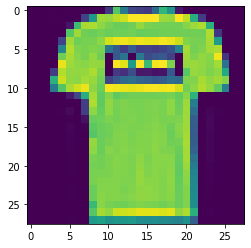

This is an image of T-shirt/top


In [11]:
# display this image
import matplotlib.pyplot as plt

index = 1
img = train_images[index]
plt.imshow(img)
plt.show()
print('This is an image of {}'.format(labels[train_labels[1]]))

In [13]:
import numpy as np

np.set_printoptions(linewidth=200)
print(train_images[1])

[[  0   0   0   0   0   1   0   0   0   0  41 188 103  54  48  43  87 168 133  16   0   0   0   0   0   0   0   0]
 [  0   0   0   1   0   0   0  49 136 219 216 228 236 255 255 255 255 217 215 254 231 160  45   0   0   0   0   0]
 [  0   0   0   0   0  14 176 222 224 212 203 198 196 200 215 204 202 201 201 201 209 218 224 164   0   0   0   0]
 [  0   0   0   0   0 188 219 200 198 202 198 199 199 201 196 198 198 200 200 200 200 201 200 225  41   0   0   0]
 [  0   0   0   0  51 219 199 203 203 212 238 248 250 245 249 246 247 252 248 235 207 203 203 222 140   0   0   0]
 [  0   0   0   0 116 226 206 204 207 204 101  75  47  73  48  50  45  51  63 113 222 202 206 220 224   0   0   0]
 [  0   0   0   0 200 222 209 203 215 200   0  70  98   0 103  59  68  71  49   0 219 206 214 210 250  38   0   0]
 [  0   0   0   0 247 218 212 210 215 214   0 254 243 139 255 174 251 255 205   0 215 217 214 208 220  95   0   0]
 [  0   0   0  45 226 214 214 215 224 205   0  42  35  60  16  17  12  13  70   

In [14]:
# Rescale the image values so that they lie in between 0 and 1

train_images = train_images/255.0
test_images = test_images/255.0

#Define a simple convolutional model


In [15]:
model = tf.keras.models.Sequential([tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(28, 28, 1)),
                                    tf.keras.layers.MaxPooling2D(3,3),
                                    tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(10, activation='softmax')])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 16)        160       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 8, 8, 16)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1024)              0         
_________________________________________________________________
dense (Dense)                (None, 10)                10250     
Total params: 10,410
Trainable params: 10,410
Non-trainable params: 0
_________________________________________________________________


In [16]:
model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss=tf.keras.losses.sparse_categorical_crossentropy,
              metrics=[tf.keras.metrics.SparseCategoricalAccuracy(), tf.keras.metrics.MeanAbsoluteError()])

# Train the model

In [17]:
history = model.fit(train_images[...,np.newaxis], train_labels, epochs=8, batch_size=256, verbose=2)

Epoch 1/8
235/235 - 12s - loss: 0.8330 - sparse_categorical_accuracy: 0.7314 - mean_absolute_error: 4.4200
Epoch 2/8
235/235 - 11s - loss: 0.4856 - sparse_categorical_accuracy: 0.8265 - mean_absolute_error: 4.4200
Epoch 3/8
235/235 - 11s - loss: 0.4280 - sparse_categorical_accuracy: 0.8497 - mean_absolute_error: 4.4200
Epoch 4/8
235/235 - 11s - loss: 0.3969 - sparse_categorical_accuracy: 0.8604 - mean_absolute_error: 4.4200
Epoch 5/8
235/235 - 11s - loss: 0.3776 - sparse_categorical_accuracy: 0.8678 - mean_absolute_error: 4.4200
Epoch 6/8
235/235 - 11s - loss: 0.3638 - sparse_categorical_accuracy: 0.8726 - mean_absolute_error: 4.4200
Epoch 7/8
235/235 - 11s - loss: 0.3530 - sparse_categorical_accuracy: 0.8758 - mean_absolute_error: 4.4200
Epoch 8/8
235/235 - 11s - loss: 0.3435 - sparse_categorical_accuracy: 0.8776 - mean_absolute_error: 4.4200


**Note:** we need to set a dummy channel dimension to the training images, otherwise `fit method` gives an error.
This is due to the fact that in the sequential model, a channel dimension is given `input_shape=(28, 28, 1)`. See following example on `np.newaxis`

# Load the history into a pandas DataFrame

In [19]:
import pandas as pd

df = pd.DataFrame(history.history)
print(df.head())

       loss  sparse_categorical_accuracy  mean_absolute_error
0  0.832960                     0.731417             4.420002
1  0.485625                     0.826500             4.420001
2  0.427963                     0.849733             4.419998
3  0.396868                     0.860383             4.420002
4  0.377643                     0.867800             4.420001


[Text(0, 0.5, 'Loss'), Text(0.5, 0, 'epochs')]

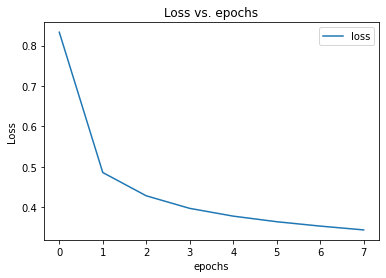

In [20]:
loss_plot = df.plot(y='loss', title='Loss vs. epochs')
loss_plot.set(xlabel='epochs', ylabel='Loss')

[Text(0, 0.5, 'MAE'), Text(0.5, 0, 'Epochs')]

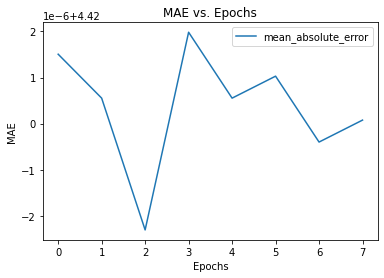

In [21]:
mae_plot = df.plot(y='mean_absolute_error', title='MAE vs. Epochs')
mae_plot.set(xlabel='Epochs', ylabel='MAE')

[Text(0, 0.5, 'sparse_categorical_accuracy'), Text(0.5, 0, 'Epochs')]

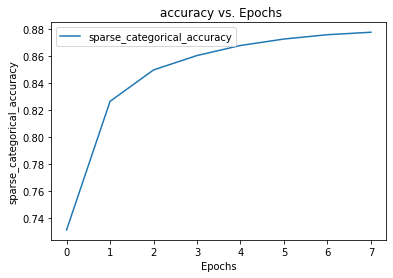

In [22]:
acc_plot = df.plot(y='sparse_categorical_accuracy', title=' accuracy vs. Epochs')
acc_plot.set(xlabel='Epochs', ylabel='sparse_categorical_accuracy')

# Evaluate and predicts methods


### Evaluate the model on test data

In [27]:
test_loss, test_acc, test_mae = model.evaluate(test_images[...,np.newaxis], test_labels, verbose=2)

313/313 - 2s - loss: 0.3607 - sparse_categorical_accuracy: 0.8746 - mean_absolute_error: 4.4200


# Make predictions from the model

### Let's choose an image from test set randomly

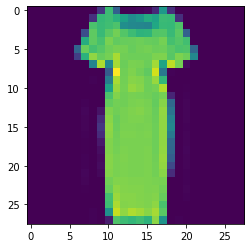

This is an image of Dress.


In [50]:
inx = np.random.choice(test_images.shape[0])

img = test_images[inx]
plt.imshow(img)
plt.show()
print('This is an image of {}.'.format(labels[test_labels[inx]]))

### Now let's check the prediction for this image from the model 

In [51]:
predictions = model.predict(img[np.newaxis,...,np.newaxis])
print(predictions)

[[1.1750850e-04 1.2473246e-03 2.4804438e-04 9.9835521e-01 2.1093767e-05 1.2813014e-09 8.5588081e-06 1.0699847e-07 1.9487300e-06 1.2491148e-07]]


**Note** that the predict method expects a batch of images for the first dimension and the number of channels for the last dimension, hence a dummy dimension both at the beginning and at the end of test image should be added.

### Use `np.argmax()` function to get the class with highest probability from predictions

In [52]:
class_img = np.argmax(predictions)
print('The image label from model prediction is: {}'.format(class_img))
print('The image is {}'.format(labels[class_img]))

The image label from model prediction is: 3
The image is Dress
